In [1]:
import pandas as pd
import numpy as np

def excel_to_xyz_array(file_path):
    """
    将特定格式的Excel数据转换为N*3的numpy数组
    第一列（B3开始）为y坐标（南北方向），第一行（C2开始）为x坐标（东西方向）
    数据区域（C3开始）为z值
    
    参数：
        file_path: Excel文件路径
        
    返回：
        N*3的numpy数组，每行为[x, y, z]
    """
    # 读取Excel文件（不设置列名，保留原始数据）
    df = pd.read_excel(file_path, header=None)
    
    # 提取x坐标（东西方向）：第一行从C2开始（即索引位置[1,2:]）
    x_coords = df.iloc[1, 2:].values.astype(float)
    
    # 提取y坐标（南北方向）：第一列从B3开始（即索引位置[2:,1]）
    y_coords = df.iloc[2:, 1].values.astype(float)
    
    # 提取z值矩阵：数据区域从C3开始（即索引位置[2:, 2:]）
    z_matrix = df.iloc[2:, 2:].values.astype(float)
    
    # 创建网格坐标
    x_grid, y_grid = np.meshgrid(x_coords, y_coords)
    
    # 展平并组合成N*3数组
    xyz_array = np.vstack((
        x_grid.ravel(), 
        y_grid.ravel(), 
        z_matrix.ravel()
    )).T
    
    return xyz_array

# 使用示例
if __name__ == "__main__":
    # 替换为您的实际文件路径
    file_path = r"E:\2025\math_model\CUMCM_Trian\20250801\CUMCM2023B\附件.xlsx"
    result_array = excel_to_xyz_array(file_path)
    
    print(f"转换后的数组形状: {result_array.shape}")
    print("前5个点:")
    print(result_array[:5])

转换后的数组形状: (50451, 3)
前5个点:
[[0.000e+00 0.000e+00 2.440e+01]
 [2.000e-02 0.000e+00 2.412e+01]
 [4.000e-02 0.000e+00 2.385e+01]
 [6.000e-02 0.000e+00 2.359e+01]
 [8.000e-02 0.000e+00 2.334e+01]]


Hemisphere: 2957 planes fitted


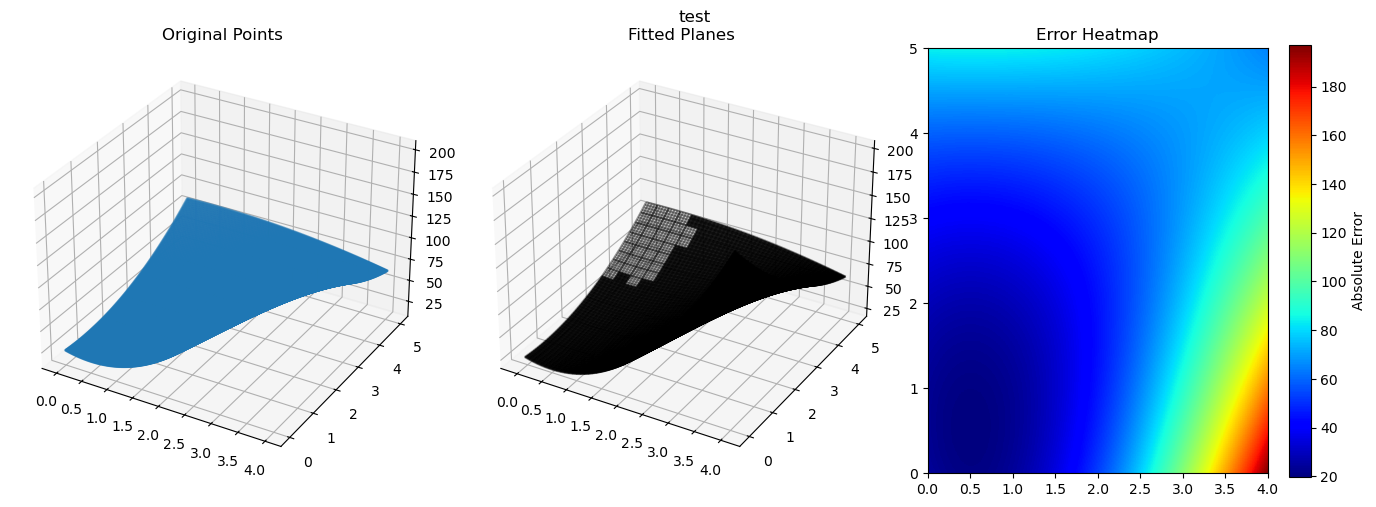

In [4]:
from ARPF import ARPF,Region,plot_result
tau = 5e-4
d_min = 1e-10
root = Region(-1, 5.5, -1, 5.5)
arpf = ARPF(mse_threshold=tau, min_region_size=d_min)
arpf.fit(xyz=result_array, root_region=root)
print(f"Hemisphere: {len(arpf.regions)} planes fitted")
plot_result(xyz=result_array,arpf=arpf, title="test")